# packages

In [1]:
import pandas as pd 
import numpy as np

# import dataset

In [2]:
from IPython.display import display

In [3]:
data = pd.read_csv('car-price_data.csv')
display(data.head(2))

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650


In [4]:
data.columns = data.columns.str.replace(' ','_').str.lower()

In [5]:
data.columns

Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity', 'msrp'],
      dtype='object')

In [6]:
features = ['make', 'model', 'year', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'msrp']

In [7]:
data = data[features]
data.head()

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,msrp
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,Coupe,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,Convertible,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,Coupe,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,Coupe,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,Convertible,28,18,34500


In [8]:
#rename target from msrp to price
data.rename(columns={'msrp':'price'},inplace=True)

In [9]:
data.fillna(0,inplace=True)

In [10]:
data.columns

Index(['make', 'model', 'year', 'engine_hp', 'engine_cylinders',
       'transmission_type', 'vehicle_style', 'highway_mpg', 'city_mpg',
       'price'],
      dtype='object')

# Question 1:
What is the most frequent observation (mode) for the column transmission_type?

In [11]:
data.transmission_type.value_counts()

transmission_type
AUTOMATIC           8266
MANUAL              2935
AUTOMATED_MANUAL     626
DIRECT_DRIVE          68
UNKNOWN               19
Name: count, dtype: int64

<Axes: xlabel='transmission_type'>

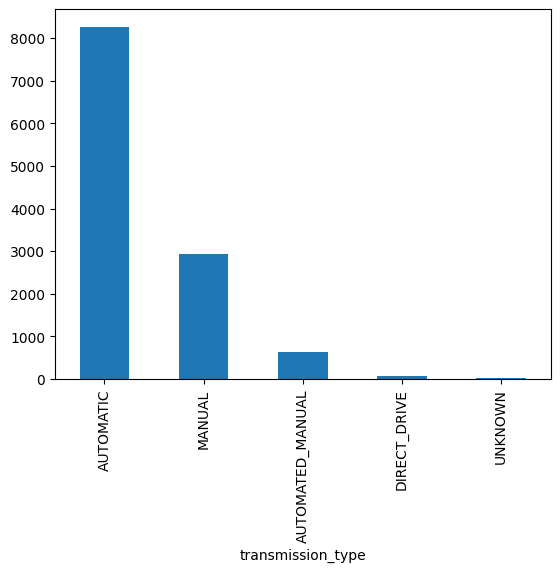

In [12]:
data.transmission_type.value_counts().plot(kind='bar')

Answer: AUTOMATIC 

# Question 2:
Create the correlation matrix for the numerical features of your dataset. In a correlation matrix, you compute the correlation coefficient between every pair of features in the dataset.

In [13]:
data.dtypes

make                  object
model                 object
year                   int64
engine_hp            float64
engine_cylinders     float64
transmission_type     object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
price                  int64
dtype: object

In [14]:
categorical_features = ['make','model','transmission_type','vehicle_style']
numerical_features = ['year','engine_hp','engine_cylinders','highway_mpg','city_mpg']

In [15]:
data[numerical_features].corrwith(data.price).sort_values(ascending=False)

engine_hp           0.650095
engine_cylinders    0.526274
year                0.227590
city_mpg           -0.157676
highway_mpg        -0.160043
dtype: float64

answer: engine_hp, engine_cylinders

# make price binary

In [16]:
data.price.describe()

count    1.191400e+04
mean     4.059474e+04
std      6.010910e+04
min      2.000000e+03
25%      2.100000e+04
50%      2.999500e+04
75%      4.223125e+04
max      2.065902e+06
Name: price, dtype: float64

In [17]:
price_mean = data.price.mean()
display(price_mean)

40594.737032063116

In [18]:
data['above_average'] = (data.price > price_mean).astype('int')
data[['price','above_average']]

,price,above_average
0,46135,1
1,40650,1
2,36350,0
3,29450,0
4,34500,0
...,...,...
11909,46120,1
11910,56670,1
11911,50620,1
11912,50920,1


# Split the dataset

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
features = ['make', 'model', 'year', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'vehicle_style',
       'highway_mpg', 'city_mpg']

In [21]:
data.columns

Index(['make', 'model', 'year', 'engine_hp', 'engine_cylinders',
       'transmission_type', 'vehicle_style', 'highway_mpg', 'city_mpg',
       'price', 'above_average'],
      dtype='object')

In [22]:
data_train_full,data_test = train_test_split(data,test_size=0.2,random_state=42)
data_train,data_val = train_test_split(data_train_full,test_size=0.25,random_state=42)

y_train = data_train.above_average.values 
y_val = data_val.above_average.values 
y_test = data_test.above_average.values 

print(100*(len(data_train)/len(data)))
print(100*(len(data_val)/len(data)))
print(100*(len(data_test)/len(data)))



59.99664260533826
20.00167869733087
20.00167869733087


In [23]:
del data_train['above_average']
del data_val['above_average']
del data_test['above_average']

# Question 3:
Which of these variables has the lowest mutual information score?

In [24]:
from sklearn.metrics import mutual_info_score

In [25]:
def calculate_ma(series):
    return mutual_info_score(series,data_train_full['above_average'])

In [26]:
df_mi = data_train_full[categorical_features].apply(calculate_ma)
df_mi.sort_values(ascending=False).to_frame(name='MI')

,MI
model,0.460994
make,0.238724
vehicle_style,0.083390
transmission_type,0.020884


answer: model

# one hor encoding

In [27]:
from sklearn.feature_extraction import DictVectorizer

In [92]:
train_dict = data_train[categorical_features+numerical_features].to_dict(orient='records')
train_dict[0]

{'make': 'Mitsubishi',
 'model': 'Endeavor',
 'transmission_type': 'AUTOMATIC',
 'vehicle_style': '4dr SUV',
 'year': 2011,
 'engine_hp': 225.0,
 'engine_cylinders': 6.0,
 'highway_mpg': 19,
 'city_mpg': 15}

In [29]:
dv = DictVectorizer(sparse=False)

In [30]:
dv.fit(train_dict)

DictVectorizer(sparse=False)

In [31]:
data_train_transformed = dv.transform(train_dict)

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [33]:
model = LogisticRegression(solver='liblinear', C=10, max_iter=1000, random_state=42)
model.fit(data_train_transformed, y_train)

LogisticRegression(C=10, max_iter=1000, random_state=42, solver='liblinear')

In [104]:
val_dict = data_val[categorical_features + numerical_features].to_dict(orient='records')
X_val = dv.transform(val_dict)

In [105]:
y_pred = model.predict_proba(X_val)[:, 1]

In [106]:
global_accuracy = round(accuracy_score(y_val, y_pred >= 0.5),2)
global_accuracy

TypeError: 'numpy.float64' object is not callable

# Question 5:

In [77]:
all_features = categorical_features + numerical_features

In [ ]:
from sklearn import metrics

In [96]:
for i in ['year','engine_hp','transmission_type','city_mpg']:

    X_train_df = pd.DataFrame(train_dict)
    X = X_train_df.drop(columns=i)
    X_dict = X.to_dict(orient='records')
    dv.fit(X_dict)
    X = dv.transform(X_dict)
    model = LogisticRegression(solver='liblinear', C=10, max_iter=1000, random_state=42)
    model.fit(X, y_train)

    # test_dict = data_test[temp].to_dict(orient='records')
    # X_test = dv.transform(test_dict)
    y_pred = model.predict_proba(X)[:, 1]
    current_accuracy = round(metrics.accuracy_score(y_train, y_pred>= 0.5),2)
    print(global_accuracy,current_accuracy)
    print("Without feature:",i," diff in accuracy is: ",np.abs(global_accuracy-current_accuracy))

0.95 0.96
Without feature: year  diff in accuracy is:  0.010000000000000009
0.95 0.94
Without feature: engine_hp  diff in accuracy is:  0.010000000000000009
0.95 0.95
Without feature: transmission_type  diff in accuracy is:  0.0
0.95 0.93
Without feature: city_mpg  diff in accuracy is:  0.019999999999999907


# Question 6:
Which of these alphas leads to the best RMSE on the validation set?

In [97]:
from sklearn.linear_model import Ridge

In [98]:
np.random.seed(42)
model_ridge = Ridge(alpha=0, solver='sag')

In [99]:
target = np.log(data['price'])
target

0        10.739327
1        10.612754
2        10.500949
3        10.290449
4        10.448715
           ...    
11909    10.739002
11910    10.945000
11911    10.832102
11912    10.838011
11913    10.274879
Name: price, Length: 11914, dtype: float64

In [100]:
features = data.drop(columns=['price', 'above_average', 'make', 'model', 'transmission_type', 'vehicle_style'])
features

,year,engine_hp,engine_cylinders,highway_mpg,city_mpg
0,2011,335.0,6.0,26,19
1,2011,300.0,6.0,28,19
2,2011,300.0,6.0,28,20
3,2011,230.0,6.0,28,18
4,2011,230.0,6.0,28,18
...,...,...,...,...,...
11909,2012,300.0,6.0,23,16
11910,2012,300.0,6.0,23,16
11911,2012,300.0,6.0,23,16
11912,2013,300.0,6.0,23,16


In [101]:
from sklearn.metrics import  mean_squared_error

In [108]:
X_train, X_val, y_train, y_val = train_test_split(features, target,test_size=0.2,
                                                 random_state=42,
                                                 shuffle=True)

In [109]:
ridge = model_ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_val)
rmse = mean_squared_error(y_val, y_pred)
rmse

97.62968140097077

In [110]:

# np.random.seed(42)
alphas = [0, 0.01, 0.1, 1, 10]
for alpha in alphas:
  model_ridge = Ridge(alpha=alpha, solver='sag')
  ridge = model_ridge.fit(X_train, y_train)
  y_pred_ridge = ridge.predict(X_val)
  rmse = mean_squared_error(y_val, y_pred)
  print(f'alpha:{alpha}, rmse: {rmse}')

alpha:0, rmse: 97.62968140097077
alpha:0.01, rmse: 97.62968140097077
alpha:0.1, rmse: 97.62968140097077
alpha:1, rmse: 97.62968140097077
alpha:10, rmse: 97.62968140097077
